# Exploratory Data Analysis

In [159]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

file_path = "../data/processed/cleaned_data.csv"

df = pd.read_csv(file_path)

df2 = pd.read_csv("../data/raw/unclean_data.csv")

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269731 entries, 0 to 269730
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         269731 non-null  int64  
 1   name       269731 non-null  object 
 2   sex        269731 non-null  object 
 3   age        269731 non-null  float64
 4   height_cm  269731 non-null  float64
 5   weight_kg  269731 non-null  float64
 6   team       269731 non-null  object 
 7   noc        269731 non-null  object 
 8   games      269731 non-null  object 
 9   year       269731 non-null  int64  
 10  season     269731 non-null  object 
 11  city       269731 non-null  object 
 12  sport      269731 non-null  object 
 13  event      269731 non-null  object 
 14  medal      39772 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 30.9+ MB


In [ ]:
df2 = df2.drop_duplicates()
df2.reset_index(drop=True, inplace=True)

def fill_missing_values(data: pd.DataFrame) -> pd.DataFrame:
    # Use sport groups to impute missing age, height, weight 
    a = df.groupby('Sport').mean(numeric_only=True)["Height"]
    for sport in a.index():
        print(sport)
    data['Height'] = data['Height'].fillna(data.groupby('Sport')['Height'].transform('mean'))

    return data
fill_missing_values(df2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.000000,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.402195,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,182.480000,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269726,135569,Andrzej ya,M,29.0,179.000000,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
269727,135570,Piotr ya,M,27.0,176.000000,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
269728,135570,Piotr ya,M,27.0,176.000000,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
269729,135571,Tomasz Ireneusz ya,M,30.0,185.000000,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [154]:
a = df2.groupby('Sport').mean(numeric_only=True)
# for sport in a.index():
#     print(sport)
a

,ID,Age,Height,Weight,Year
Sport,,,,,
Aeronautics,107506.000000,26.000000,NaN,NaN,1936.000000
Alpine Skiing,66487.294371,23.205462,173.489052,72.068110,1985.203534
Alpinism,79639.320000,38.812500,NaN,NaN,1925.600000
Archery,71015.393316,27.935226,173.203085,70.011135,1987.533847
Art Competitions,67506.074680,44.719596,174.343750,77.894737,1933.756960
...,...,...,...,...,...
Tug-Of-War,70270.747059,29.309524,182.480000,95.615385,1909.552941
Volleyball,70635.202996,25.183800,186.994822,78.900214,1992.202115
Water Polo,68645.384295,25.659627,184.834648,84.566446,1975.624545


In [158]:
for sport in ["Athletics", "Swimming"]:
    mean = df2[df2["Sport"] == sport]["Height"].mean()
    df2[df2["Sport"] == sport]["Height"].fillna(mean, inplace=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


/var/folders/kr/36825vtj0w52wlmvq1fzcz4m0000gn/T/ipykernel_317/2109345918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[df2["Sport"] == sport]["Height"].fillna(mean, inplace=True)


In [147]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269731 entries, 0 to 269730
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Sex     269731 non-null  object 
 3   Age     260416 non-null  float64
 4   Height  269632 non-null  float64
 5   Weight  208204 non-null  float64
 6   Team    269731 non-null  object 
 7   NOC     269731 non-null  object 
 8   Games   269731 non-null  object 
 9   Year    269731 non-null  int64  
 10  Season  269731 non-null  object 
 11  City    269731 non-null  object 
 12  Sport   269731 non-null  object 
 13  Event   269731 non-null  object 
 14  Medal   39772 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 30.9+ MB


In [117]:
def fill_missing_values(data: pd.DataFrame) -> pd.DataFrame:
    # Use sport groups to impute missing age, height, weight 
    # avg_age = data.groupby('sport')['age'].transform('mean')
    # avg_height = data.groupby('sport')['height_cm'].transform('mean')
    # avg_weight = data.groupby('sport')['weight_kg'].transform('mean')
    # data = data.fillna({"age": avg_age, "height_cm": avg_height, "weight_kg": avg_weight, "medal": "No Medal"})

    cols = data.columns
    cols_standardised = [c.lower() for c in cols]
    data = data.rename(columns=dict(zip(cols, cols_standardised)))
    data = data.rename(columns={"weight": "weight_kg", "height": "height_cm"})


    data['age'] = data['age'].fillna(data.groupby('sport')['age'].transform('mean'))
    data['height_cm'] = data['age'].fillna(data.groupby('sport')['height_cm'].transform('mean'))
    data['weight_kg'] = data['age'].fillna(data.groupby('sport')['weight_kg'].transform('mean'))
    return data

fill_missing_values(df2).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         271116 non-null  int64  
 1   name       271116 non-null  object 
 2   sex        271116 non-null  object 
 3   age        271116 non-null  float64
 4   height_cm  271116 non-null  float64
 5   weight_kg  271116 non-null  float64
 6   team       271116 non-null  object 
 7   noc        271116 non-null  object 
 8   games      271116 non-null  object 
 9   year       271116 non-null  int64  
 10  season     271116 non-null  object 
 11  city       271116 non-null  object 
 12  sport      271116 non-null  object 
 13  event      271116 non-null  object 
 14  medal      39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [113]:
# for sport in 
avg_height = df2.groupby('Sport').mean(numeric_only=True)["Height"]
# df2.drop_duplicates().fillna(avg_height).info()
avg_height


Sport
Aeronautics                NaN
Alpine Skiing       173.489052
Alpinism                   NaN
Archery             173.203085
Art Competitions    174.644068
                       ...    
Tug-Of-War          182.480000
Volleyball          186.994822
Water Polo          184.834648
Weightlifting       167.824801
Wrestling           172.358586
Name: Height, Length: 66, dtype: float64

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269731 entries, 0 to 269730
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         269731 non-null  int64  
 1   name       269731 non-null  object 
 2   sex        269731 non-null  object 
 3   age        269731 non-null  float64
 4   height_cm  269632 non-null  float64
 5   weight_kg  269514 non-null  float64
 6   team       269731 non-null  object 
 7   noc        269731 non-null  object 
 8   games      269731 non-null  object 
 9   year       269731 non-null  int64  
 10  season     269731 non-null  object 
 11  city       269731 non-null  object 
 12  sport      269731 non-null  object 
 13  event      269731 non-null  object 
 14  medal      269731 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 30.9+ MB


In [ ]:
def fill_missing_values(data: pd.DataFrame) -> pd.DataFrame:
    # Use sport groups to impute missing age, height, weight 
    data['age'] = data['age'].fillna(data.groupby('sport')['age'].transform('mean'))
    data['height_cm'] = data['height_cm'].fillna(data.groupby('sport')['height_cm'].transform('mean'))
    data['weight_kg'] = data['weight_kg'].fillna(data.groupby('sport')['weight_kg'].transform('mean'))
    data["medal"] = data["medal"].fillna("No Medal")
    return data

In [56]:
df[(df["sport"] == "Figure Skating") & (df["season"] == "Summer")]

,id,name,sex,age,height_cm,weight_kg,team,noc,games,year,season,city,sport,event,medal
16898,9087,Kenneth Macdonald Beaumont,M,36.00000,168.20216,59.543651,Great Britain,Gbr,1920 Summer,1924,Summer,Antwerpen,Figure Skating,Figure Skating Men'S Singles,No Medal
16899,9087,Kenneth Macdonald Beaumont,M,36.00000,168.20216,59.543651,Great Britain-3,Gbr,1920 Summer,1924,Summer,Antwerpen,Figure Skating,Figure Skating Mixed Pairs,No Medal
16900,9088,Madeleine St. John Beaumont (Brodrick-),F,36.00000,168.20216,59.543651,Great Britain-3,Gbr,1920 Summer,1924,Summer,Antwerpen,Figure Skating,Figure Skating Mixed Pairs,No Medal
29497,15308,Isaac Irving Brokaw,M,38.00000,168.20216,59.543651,United States,Usa,1908 Summer,1932,Summer,London,Figure Skating,Figure Skating Men'S Singles,No Medal
30737,15911,Alexia Marie Bryn (Schien-),F,31.00000,168.20216,59.543651,Norway,Nor,1920 Summer,1936,Summer,Antwerpen,Figure Skating,Figure Skating Mixed Pairs,Silver
30740,15912,Yngvar Bryn,M,38.00000,168.20216,59.543651,Norway,Nor,1920 Summer,1936,Summer,Antwerpen,Figure Skating,Figure Skating Mixed Pairs,Silver
31990,16529,Heinrich Burger,M,26.00000,168.20216,59.543651,Germany,Ger,1908 Summer,1936,Summer,London,Figure Skating,Figure Skating Mixed Pairs,Gold
46895,24288,Arthur Warren Jack Cumming,M,18.00000,168.20216,59.543651,Great Britain,Gbr,1908 Summer,1952,Summer,London,Figure Skating,Figure Skating Men'S Special Figures,Silver
82717,42258,Gillis Emanuel Grafstrm,M,26.00000,168.20216,59.543651,Sweden,Swe,1920 Summer,1968,Summer,Antwerpen,Figure Skating,Figure Skating Men'S Singles,Gold
83520,42681,Dorothy Vernon Greenhough-Smith (Muddock-),F,25.00000,168.20216,59.543651,Great Britain,Gbr,1908 Summer,1968,Summer,London,Figure Skating,Figure Skating Women'S Singles,Bronze


In [40]:
age_by_sport = df.groupby("sport").mean("age")["age"].sort_values(ascending=False)
age_by_sport

sport
Roque                    53.333333
Art Competitions         44.719596
Alpinism                 38.812500
Polo                     35.333333
Equestrianism            34.390831
                           ...    
Diving                   22.481441
Synchronized Swimming    22.366851
Figure Skating           22.232190
Swimming                 20.566803
Rhythmic Gymnastics      18.737082
Name: age, Length: 66, dtype: float64

<Axes: xlabel='sport', ylabel='age'>

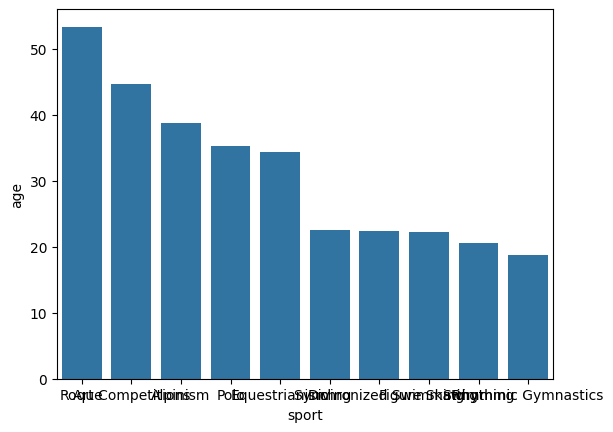

In [48]:
top_5_bottom_5_age_by_sport = pd.concat([age_by_sport.head(), age_by_sport.tail()])

sns.barplot(top_5_bottom_5_age_by_sport)

In [49]:
top_5_bottom_5_age_by_sport

sport
Roque                    53.333333
Art Competitions         44.719596
Alpinism                 38.812500
Polo                     35.333333
Equestrianism            34.390831
Diving                   22.481441
Synchronized Swimming    22.366851
Figure Skating           22.232190
Swimming                 20.566803
Rhythmic Gymnastics      18.737082
Name: age, dtype: float64

In [13]:
df.groupby("sport").max("year")["year"].sort_values(ascending=False)

# About 1/7 of sports were dropped from the Olympics over 70 years ago


sport
Wrestling        2016
Equestrianism    2016
Football         2016
Gymnastics       2016
Handball         2016
                 ... 
Lacrosse         1908
Roque            1904
Croquet          1900
Cricket          1900
Basque Pelota    1900
Name: year, Length: 66, dtype: int64

In [14]:
df["year"].min()

np.int64(1896)

In [17]:
first_year_per_sport = df.groupby("sport").min("year")["year"]
last_year_per_sport = df.groupby("sport").max("year")["year"]
duration_per_sport = (last_year_per_sport - first_year_per_sport).sort_values(ascending=False)
duration_per_sport

# Some sports have only been played once
# Historic sports: 
    # Wrestling, Weightlifting, Shooting, Fencing Cycling, Gymnastics, Swimming, Athletics, etc
    # (Tennis not continuous, upon research)

# Idea: investigate Olympic record progression across historic sports 

sport
Wrestling        120
Weightlifting    120
Shooting         120
Tennis           120
Fencing          120
                ... 
Jeu De Paume       0
Croquet            0
Cricket            0
Basque Pelota      0
Aeronautics        0
Name: year, Length: 66, dtype: int64

In [39]:
years = df["year"].unique()

for year in range(1896, 2020, 4):
    if year not in years:
        print(f"Year missed: {year}")

for year in years:
    if year % 2 != 0:
        print(f"Odd year: {year}")

for i in range(1, len(years)):
    if years[i] - years[i - 1] != 4:
        print(f"Gap devation between: {years[i - 1]} and {years[i]}")

# The gap deviations are a mix of delayed/cancelled winter/summer Olympics and the eventual change of winter Olympics to 2 years apart from summer Olympics 

Year missed: 1916
Year missed: 1940
Year missed: 1944
Gap devation between: 1904 and 1906
Gap devation between: 1906 and 1908
Gap devation between: 1912 and 1920
Gap devation between: 1936 and 1948
Gap devation between: 1992 and 1994
Gap devation between: 1994 and 1996
Gap devation between: 1996 and 1998
Gap devation between: 1998 and 2000
Gap devation between: 2000 and 2002
Gap devation between: 2002 and 2004
Gap devation between: 2004 and 2006
Gap devation between: 2006 and 2008
Gap devation between: 2008 and 2010
Gap devation between: 2010 and 2012
Gap devation between: 2012 and 2014
Gap devation between: 2014 and 2016


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269731 entries, 0 to 269730
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         269731 non-null  int64  
 1   name       269731 non-null  object 
 2   sex        269731 non-null  object 
 3   age        269731 non-null  float64
 4   height_cm  269632 non-null  float64
 5   weight_kg  269514 non-null  float64
 6   team       269731 non-null  object 
 7   noc        269731 non-null  object 
 8   games      269731 non-null  object 
 9   year       269731 non-null  int64  
 10  season     269731 non-null  object 
 11  city       269731 non-null  object 
 12  sport      269731 non-null  object 
 13  event      269731 non-null  object 
 14  medal      269731 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 30.9+ MB


In [53]:
df["season"].unique()

array(['Summer', 'Winter'], dtype=object)

In [66]:
sports = df["sport"].unique()
sports.sort()
sports


array(['Aeronautics', 'Alpine Skiing', 'Alpinism', 'Archery',
       'Art Competitions', 'Athletics', 'Badminton', 'Baseball',
       'Basketball', 'Basque Pelota', 'Beach Volleyball', 'Biathlon',
       'Bobsleigh', 'Boxing', 'Canoeing', 'Cricket', 'Croquet',
       'Cross Country Skiing', 'Curling', 'Cycling', 'Diving',
       'Equestrianism', 'Fencing', 'Figure Skating', 'Football',
       'Freestyle Skiing', 'Golf', 'Gymnastics', 'Handball', 'Hockey',
       'Ice Hockey', 'Jeu De Paume', 'Judo', 'Lacrosse', 'Luge',
       'Military Ski Patrol', 'Modern Pentathlon', 'Motorboating',
       'Nordic Combined', 'Polo', 'Racquets', 'Rhythmic Gymnastics',
       'Roque', 'Rowing', 'Rugby', 'Rugby Sevens', 'Sailing', 'Shooting',
       'Short Track Speed Skating', 'Skeleton', 'Ski Jumping',
       'Snowboarding', 'Softball', 'Speed Skating', 'Swimming',
       'Synchronized Swimming', 'Table Tennis', 'Taekwondo', 'Tennis',
       'Trampolining', 'Triathlon', 'Tug-Of-War', 'Volleyball',
   

In [68]:
def get_events(sport, gender):
    sport_df = df[df["sport"] == sport]
    events = sport_df["event"].unique()
    mapper = {"Male": "Men", "Female": "Women"}
    events = [e for e in events if mapper[gender] in e]
    events.sort()
    return events

get_events("Athletics", "Male")

["Athletics Men'S 1,500 Metres",
 "Athletics Men'S 1,500 Metres Walk",
 "Athletics Men'S 1,600 Metres Medley Relay",
 "Athletics Men'S 10 Kilometres Walk",
 "Athletics Men'S 10 Mile Walk",
 "Athletics Men'S 10,000 Metres",
 "Athletics Men'S 100 Metres",
 "Athletics Men'S 110 Metres Hurdles",
 "Athletics Men'S 2,500 Metres Steeplechase",
 "Athletics Men'S 2,590 Metres Steeplechase",
 "Athletics Men'S 20 Kilometres Walk",
 "Athletics Men'S 200 Metres",
 "Athletics Men'S 200 Metres Hurdles",
 "Athletics Men'S 3 Mile, Team",
 "Athletics Men'S 3,000 Metres Steeplechase",
 "Athletics Men'S 3,000 Metres Walk",
 "Athletics Men'S 3,000 Metres, Team",
 "Athletics Men'S 3,200 Metres Steeplechase",
 "Athletics Men'S 3,500 Metres Walk",
 "Athletics Men'S 4 Mile, Team",
 "Athletics Men'S 4 X 100 Metres Relay",
 "Athletics Men'S 4 X 400 Metres Relay",
 "Athletics Men'S 4,000 Metres Steeplechase",
 "Athletics Men'S 400 Metres",
 "Athletics Men'S 400 Metres Hurdles",
 "Athletics Men'S 5 Mile",
 "Athlet

In [130]:
def get_avg(sport, event, is_optimal):
    """
    Return: average age, height, weight for sport, event; if is_optimal, then averages for Gold medalists
    """
    avg_df = df[(df["sport"] == sport) & (df["event"] == event)]
    if is_optimal:
        avg_age = avg_df[avg_df["medal"] == "Gold"]["age"].mean()
        avg_height = avg_df[avg_df["medal"] == "Gold"]["height_cm"].mean()
        avg_weight = avg_df[avg_df["medal"] == "Gold"]["weight_kg"].mean()
    else: 
        avg_age = avg_df["age"].mean()
        avg_height = avg_df["height_cm"].mean()
        avg_weight = avg_df["weight_kg"].mean()

    return (avg_age, avg_height, avg_weight)

get_avg("Athletics", "Men's 100m", True)

(nan, nan, nan)

In [73]:
def perc_dif(value, avg_value):
    perc = 100 * ((value - avg_value) / avg_value)
    return np.round(perc, 1)

perc_dif(100, 101)

np.float64(-1.0)

In [75]:
df[df["sport"] == "Cricket"]

,id,name,sex,age,height_cm,weight_kg,team,noc,games,year,season,city,sport,event,medal
6884,3871,William Wallace Anderson,M,40.000000,NaN,NaN,Union Des Socits Franais De Sports Athletiques,Gbr,1900 Summer,1900,Summer,Paris,Cricket,Cricket Men'S Cricket,Silver
10716,5871,"William Dunbar ""Willie"" Attrill",M,29.333333,NaN,NaN,Union Des Socits Franais De Sports Athletiques,Fra,1900 Summer,1900,Summer,Paris,Cricket,Cricket Men'S Cricket,Silver
16742,9009,Charles Beachey Beachcroft (Kay-),M,29.333333,NaN,NaN,Devon And Somerset Wanderers,Gbr,1900 Summer,1900,Summer,Paris,Cricket,Cricket Men'S Cricket,Gold
22109,11696,Arthur Ernest Burrington Birkett,M,24.000000,NaN,NaN,Devon And Somerset Wanderers,Gbr,1900 Summer,1900,Summer,Paris,Cricket,Cricket Men'S Cricket,Gold
27308,14259,Alfred James Bowerman,M,26.000000,NaN,NaN,Devon And Somerset Wanderers,Gbr,1900 Summer,1900,Summer,Paris,Cricket,Cricket Men'S Cricket,Gold
27933,14556,J. Braid,M,29.333333,NaN,NaN,Union Des Socits Franais De Sports Athletiques,Gbr,1900 Summer,1900,Summer,Paris,Cricket,Cricket Men'S Cricket,Silver
30098,15626,W. Browning,M,29.333333,NaN,NaN,Union Des Socits Franais De Sports Athletiques,Gbr,1900 Summer,1900,Summer,Paris,Cricket,Cricket Men'S Cricket,Silver
31156,16101,George John Buckley,M,24.000000,NaN,NaN,Devon And Somerset Wanderers,Gbr,1900 Summer,1900,Summer,Paris,Cricket,Cricket Men'S Cricket,Gold
31877,16474,Francis Romulus Burchell,M,26.000000,NaN,NaN,Devon And Somerset Wanderers,Gbr,1900 Summer,1900,Summer,Paris,Cricket,Cricket Men'S Cricket,Gold
41063,21277,Frederick William Christian,M,32.000000,NaN,NaN,Devon And Somerset Wanderers,Gbr,1900 Summer,1900,Summer,Paris,Cricket,Cricket Men'S Cricket,Gold


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269731 entries, 0 to 269730
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         269731 non-null  int64  
 1   name       269731 non-null  object 
 2   sex        269731 non-null  object 
 3   age        269731 non-null  float64
 4   height_cm  269632 non-null  float64
 5   weight_kg  269514 non-null  float64
 6   team       269731 non-null  object 
 7   noc        269731 non-null  object 
 8   games      269731 non-null  object 
 9   year       269731 non-null  int64  
 10  season     269731 non-null  object 
 11  city       269731 non-null  object 
 12  sport      269731 non-null  object 
 13  event      269731 non-null  object 
 14  medal      269731 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 30.9+ MB


In [131]:

def get_avg(sport, event, is_optimal):
    """
    Return: average age, height, weight for sport, event; if is_optimal, then averages for Gold medalists
    """
    avg_df = df[(df["sport"] == sport) & (df["event"] == event)]
    if is_optimal:
        avg_age = avg_df[avg_df["medal"] == "Gold"]["age"].mean()
        avg_height = avg_df[avg_df["medal"] == "Gold"]["height_cm"].mean()
        avg_weight = avg_df[avg_df["medal"] == "Gold"]["weight_kg"].mean()
        return avg_df
    else: 
        avg_age = avg_df["age"].mean()
        avg_height = avg_df["height_cm"].mean()
        avg_weight = avg_df["weight_kg"].mean()

    # return (np.round(avg_age, 1), np.round(avg_height, 1), np.round(avg_weight, 1))

get_avg("Athletics", "Athletics Men'S 1,500 Metres", True)

,id,name,sex,age,height_cm,weight_kg,team,noc,games,year,season,city,sport,event,medal
98,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,30.0,30.0,France,Fra,2012 Summer,2012,Summer,London,Athletics,"Athletics Men'S 1,500 Metres",No Medal
190,86,Jos Manuel Abascal Gmez,M,22.0,22.0,22.0,Spain,Esp,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men'S 1,500 Metres",No Medal
191,86,Jos Manuel Abascal Gmez,M,26.0,26.0,26.0,Spain,Esp,1984 Summer,1984,Summer,Los Angeles,Athletics,"Athletics Men'S 1,500 Metres",Bronze
425,234,Abdalla Abdelgadir El-Sheikh,M,21.0,21.0,21.0,Sudan,Sud,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Men'S 1,500 Metres",No Medal
732,420,"Olof Viktor ""Olle"" Berg",M,27.0,27.0,27.0,Sweden,Swe,1952 Summer,1952,Summer,Helsinki,Athletics,"Athletics Men'S 1,500 Metres",No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268998,135252,Branko Zorko,M,21.0,21.0,21.0,Yugoslavia,Yug,1988 Summer,1988,Summer,Seoul,Athletics,"Athletics Men'S 1,500 Metres",No Medal
268999,135252,Branko Zorko,M,25.0,25.0,25.0,Croatia,Cro,1992 Summer,1992,Summer,Barcelona,Athletics,"Athletics Men'S 1,500 Metres",No Medal
269000,135252,Branko Zorko,M,29.0,29.0,29.0,Croatia,Cro,1996 Summer,1996,Summer,Atlanta,Athletics,"Athletics Men'S 1,500 Metres",No Medal
269001,135252,Branko Zorko,M,33.0,33.0,33.0,Croatia,Cro,2000 Summer,2000,Summer,Sydney,Athletics,"Athletics Men'S 1,500 Metres",No Medal


In [132]:
df

,id,name,sex,age,height_cm,weight_kg,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,24.0,24.0,China,Chn,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men'S Basketball,No Medal
1,2,A Lamusi,M,23.0,23.0,23.0,China,Chn,2012 Summer,2012,Summer,London,Judo,Judo Men'S Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,24.0,24.0,Denmark,Den,1920 Summer,1920,Summer,Antwerpen,Football,Football Men'S Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,34.0,34.0,Denmark/Sweden,Den,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men'S Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,21.0,21.0,Netherlands,Ned,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women'S 500 Metres,No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269726,135569,Andrzej Ya,M,29.0,29.0,29.0,Poland-1,Pol,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'S Doubles,No Medal
269727,135570,Piotr Ya,M,27.0,27.0,27.0,Poland,Pol,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men'S Large Hill, Individual",No Medal
269728,135570,Piotr Ya,M,27.0,27.0,27.0,Poland,Pol,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men'S Large Hill, Team",No Medal
269729,135571,Tomasz Ireneusz Ya,M,30.0,30.0,30.0,Poland,Pol,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men'S Four,No Medal
